In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from fish.ephys import ephys
from glob import glob
%matplotlib inline

In [66]:
def prepare_swim(swims):
    from numpy import percentile
    from fish.ephys.ephys import windowed_variance
    
    swim_flt = [windowed_variance(s, kern_mean=None, kern_var=None)[0] for s in swims]
    ts = (swim_flt[0] + swim_flt[1])
    ts = ts.clip(max = np.percentile(ts, 99.99))
    ts -= ts.min()
    ts /= ts.max()
    return ts

In [67]:
exp_dir = '/groups/ahrens/ahrenslab/davis/data/ephys/20170328/'
#proc_dir = exp_dir + 'proc/'
#if not os.path.exists(proc_dir):
#    os.makedirs(proc_dir)

fnames_ep = glob(exp_dir + '*.10chFlt')
fnames_ep.sort()
for ind, f in enumerate(fnames_ep):
    print('{0} : {1}'.format(ind, f))

exps = np.arange(len(fnames_ep))
exp_names = [fnames_ep[e].split('/')[-1].split('.')[0] for e in exps]

dats = [ephys.load(fnames_ep[e]) for e in exps]

0 : /groups/ahrens/ahrenslab/davis/data/ephys/20170328/6dpf_cy252xcy293_g1_f1_ga_1.10chFlt
1 : /groups/ahrens/ahrenslab/davis/data/ephys/20170328/6dpf_cy252xcy293_g1_f1_ol_cl_1.10chFlt
2 : /groups/ahrens/ahrenslab/davis/data/ephys/20170328/6dpf_cy252xcy293_g1_f1_omr_opto_2.10chFlt


In [101]:
cur_exp = 1
fs = 6000
exp_name = exp_names[cur_exp]
dat = ephys.load(fnames_ep[cur_exp])
trial_signal = dat[6].copy()
swim_pow = prepare_swim(dat[0:2])
rois = ephys.chop_trials(trial_signal)
conds = [int(x) for x in rois if x > 0]

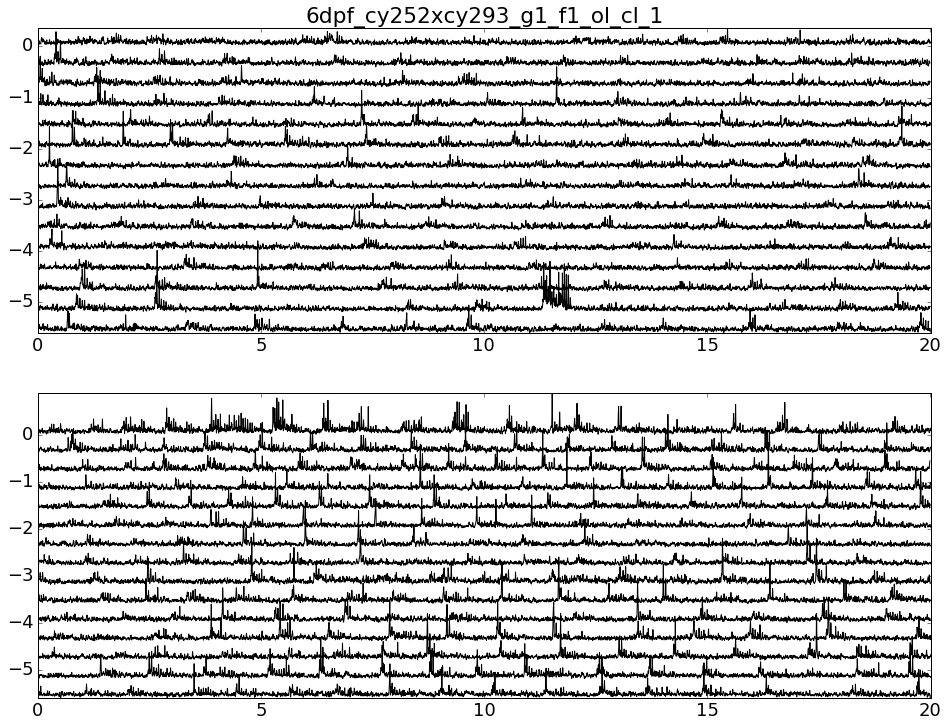

In [112]:
matplotlib.rcParams.update({'font.size': 18})

nr = len(conds)
nc = 1
scale = .4
fig, axs = plt.subplots(nrows=nr, ncols = nc, figsize=(16 * nc, 6 * nr))

if len(conds) == 1:
    axs = [[ax] for ax in axs]
axs[0].title.set_text(exp_name)    

for ind_c, cond in enumerate(conds):
    for tr in range(len(rois[cond][0])):
        plr = np.arange(rois[cond][0][tr], rois[cond][1][tr])
        axs[ind_c].plot((plr - plr[0]) / fs, swim_pow[plr] - tr * scale, color='k')        
        axs[ind_c].axis('tight')        